In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Cargamos nuestro archivo CSV previamente ya preparado para su analisis, donde lo cargamos con la libreria pandas y mostramos las primeras 5 filas
df = pd.read_csv('Final.csv')

#Eliminamos la categoria de id de las columnas, esta no es necesaria en general solo es 1 categoria y ya se tiene el nombre
#creamos un df de la correlacion unicamente de los valores numericos
df = df.drop(columns=['ID_CATEGORY'])
dfCorr = df.corr(numeric_only=True)

#De nuestro DF principal nos aseguramos que sea de tipo fecha
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[df['BRAND'] == 'VANISH']

#Agrupamos por cada producto y sumamos el Total de Unidades y Total de Ventas de cada Producto, lo ordenamos por el Total de Valor de Mayor a Menor
dfProductSalesValue = df.groupby('ITEM_CODE')[['TOTAL_UNIT_SALES','TOTAL_VALUE_SALES']].sum().reset_index().sort_values(by='TOTAL_VALUE_SALES', ascending = False)

#Del Df ya agrupado y sumado de los Valores ahora lo Ordenamos por el Total de Unidades
dfProductSalesUnit = dfProductSalesValue.sort_values(by='TOTAL_UNIT_SALES', ascending=False)

# Analisis por TOTAL de Venta

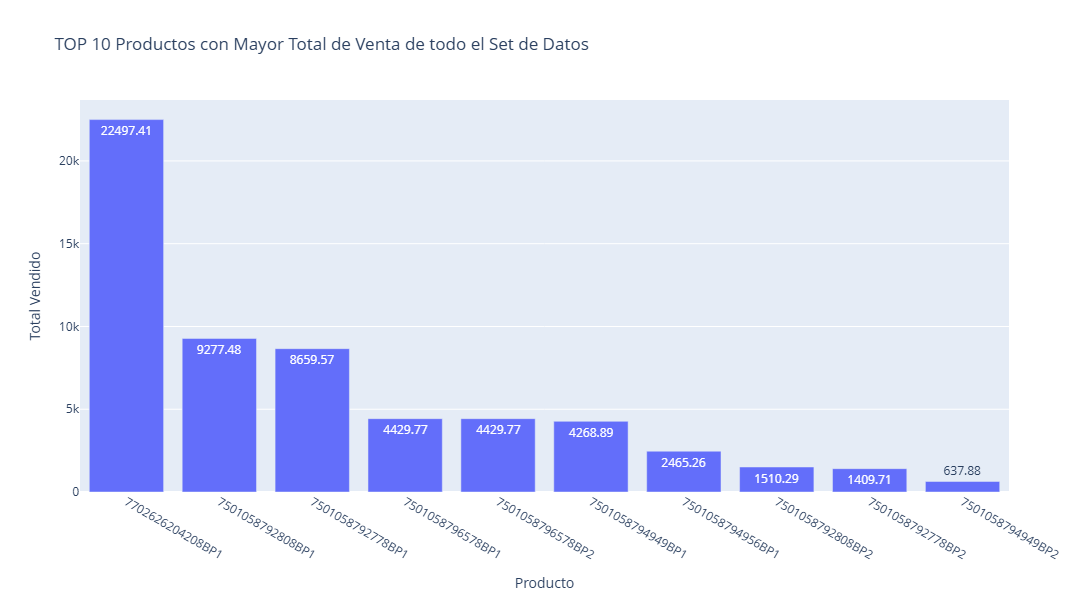

In [21]:
fig = px.bar(
    dfProductSalesValue.head(10),
    x="ITEM_CODE",
    y="TOTAL_VALUE_SALES",
    title="TOP 10 Productos con Mayor Total de Venta de todo el Set de Datos",
    text=dfProductSalesValue.head(10)["TOTAL_VALUE_SALES"].round(2),
    height=600,
    labels={
        "ITEM_CODE": "Producto",
        "TOTAL_VALUE_SALES": "Total Vendido"
    }
)
fig.show()

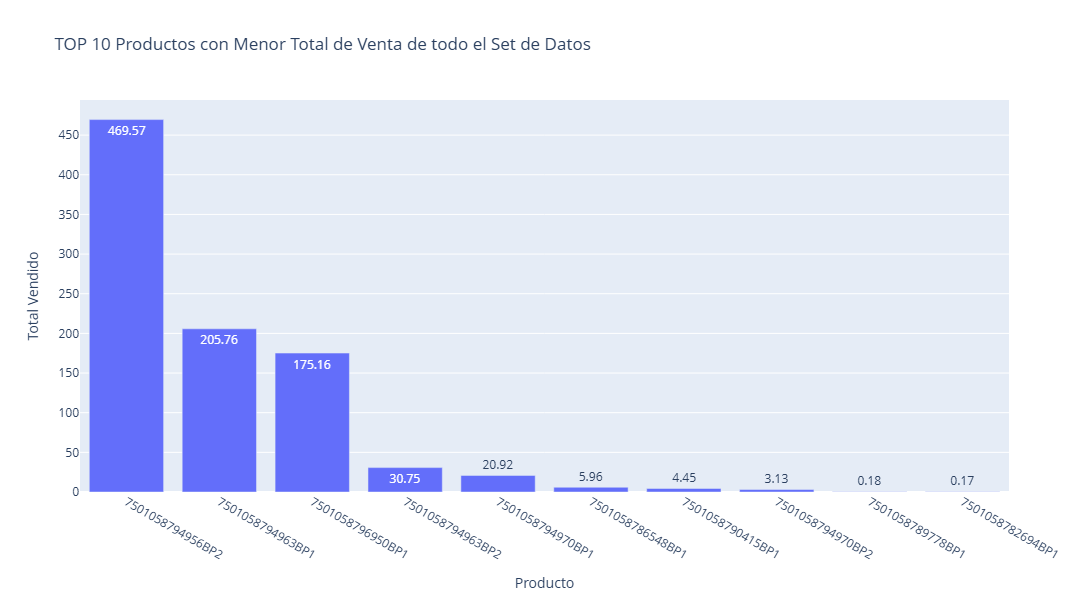

In [22]:
fig = px.bar(
    dfProductSalesValue.tail(10),
    x="ITEM_CODE",
    y="TOTAL_VALUE_SALES",
    title="TOP 10 Productos con Menor Total de Venta de todo el Set de Datos",
    text=dfProductSalesValue.tail(10)["TOTAL_VALUE_SALES"].round(2),
    height=600,
    labels={
        "ITEM_CODE": "Producto",
        "TOTAL_VALUE_SALES": "Total Vendido"
    }
)
fig.show()

# Analisis por UNIDADES Vendidas

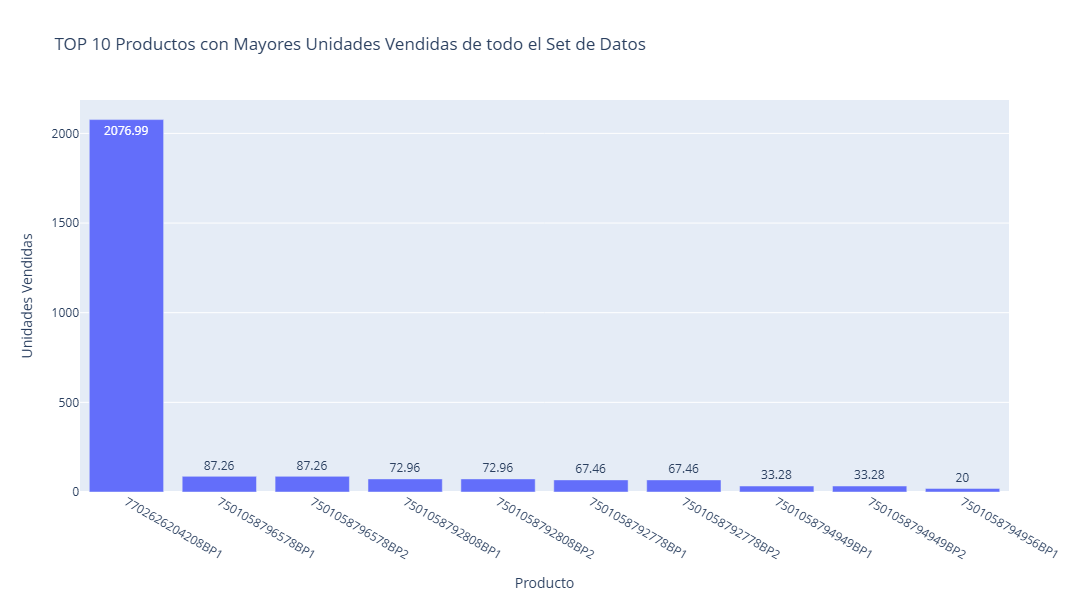

In [23]:
fig = px.bar(
    dfProductSalesUnit.head(10),
    x="ITEM_CODE",
    y="TOTAL_UNIT_SALES",
    title="TOP 10 Productos con Mayores Unidades Vendidas de todo el Set de Datos",
    text=dfProductSalesUnit.head(10)["TOTAL_UNIT_SALES"].round(2),
    height=600,
    labels={
        "ITEM_CODE": "Producto",
        "TOTAL_UNIT_SALES": "Unidades Vendidas"
    }
)
fig.show()

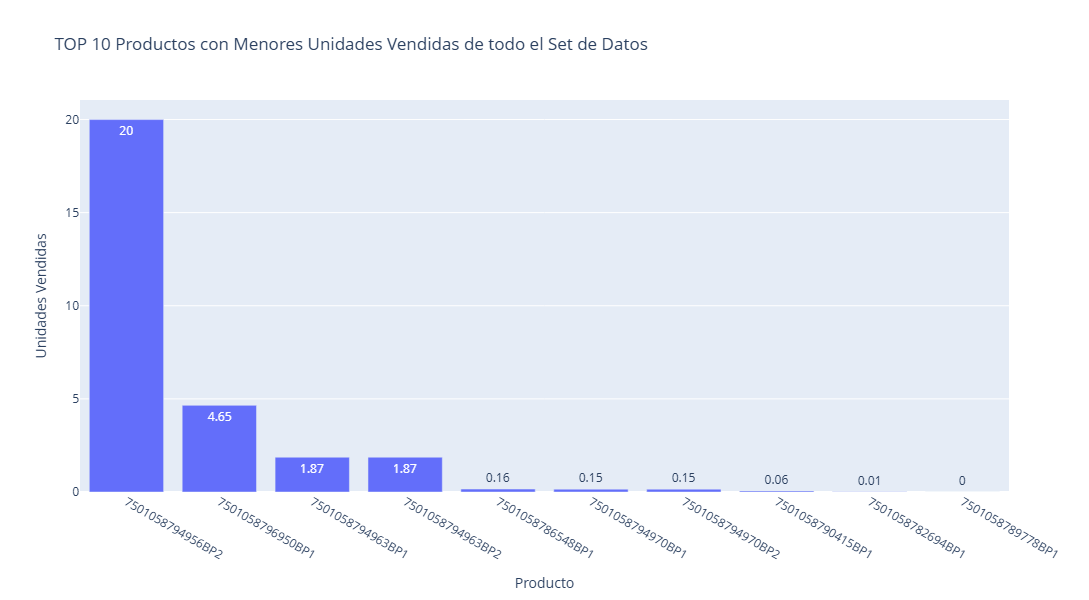

In [24]:
fig = px.bar(
    dfProductSalesUnit.tail(10),
    x="ITEM_CODE",
    y="TOTAL_UNIT_SALES",
    title="TOP 10 Productos con Menores Unidades Vendidas de todo el Set de Datos",
    text=dfProductSalesUnit.tail(10)["TOTAL_UNIT_SALES"].round(2),
    height=600,
    labels={
        "ITEM_CODE": "Producto",
        "TOTAL_UNIT_SALES": "Unidades Vendidas"
    }
)
fig.show()